In [1]:
%matplotlib inline

import imageio
import scipy.stats
import scipy.special
import matplotlib

import numpy as np
import pandas as pd
from numpy import array as arr

import os
import re
import math

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D

from astropy.io import fits

from scipy.stats import sem 
from scipy import ndimage as ndi
from scipy.optimize import curve_fit

import sys
sys.path.append('../../Analysis_code/klab_python_lib/')

import klib

### Can comment below if not editing klib
%load_ext autoreload
%aimport klib
%autoreload

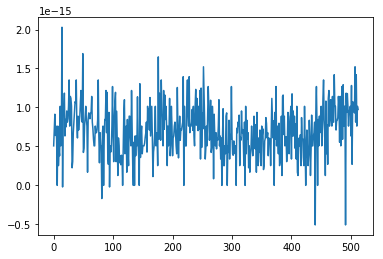

allan deviation: 5.183827736e-16 +- 1.7271332924e-17/sqrt(Hz)


[1, 400, 3, 50]

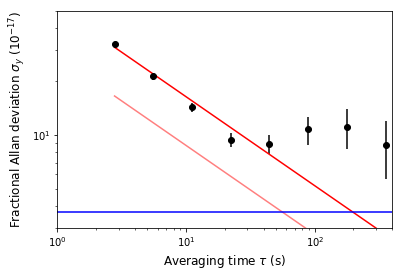

In [8]:
TR = 0.5  # Ramsey time.  Approximating as just hold time between pulses (conservative).
f0 = 429.8*10**12
cycle_dead = 0.09 + 0.03 # dead time per cycle. 90ms for imaging etc, 30ms for pi/2 pulses
cycles = 4 # number of cycles
load_time = 0.3 
Trep = load_time + cycles*(TR+cycle_dead)
contrast = 73 # measured contrast %, from set 29.  +- 3% 
fracfreqs =(1/(f0*contrast*np.pi*TR))*losses # convert loss to fractional frequency excursion
lasernoise = 3.7*10**(-17) # allan deviation associated with laser noise

plt.plot(fracfreqs)
plt.show()

def rootfit(t, a):
    return a/np.sqrt(t)

def bindata(data, n):
    m = len(data)
    if m%n:
        data = data[:-(m%n)]
    summed = [0]*int(m/n)
    for i in range(n):
        summed += data[i::n]
    return summed/n


taus = []
avars = []
avar_errs = []

nmax = np.floor(np.log2(len(losses)))-1
for n in np.arange(0, nmax):
    n = int(n)
    summed = bindata(fracfreqs,2**n)
    avar = 0.5*np.mean((summed[1:]-summed[:-1])**2)
    taus.append((2**n)*Trep)
    avars.append(avar)
    avar_errs.append(avar/(2*len(summed)))
    
adevs = np.sqrt(avars)
adev_errs = np.sqrt(avar_errs)
#popt, pcov = curve_fit(rootfit, taus[:3], np.sqrt(adevs[:3]**2 - lasernoise**2), sigma = adev_errs[:3])
popt, pcov = curve_fit(rootfit, taus[:3], adevs[:3], sigma = adev_errs[:3])


#plt.loglog(taus, rootfit(taus, *popt)*10**17, 'r-')
ax = plt.gca()

ax.plot(taus, rootfit(taus, *popt)*10**17, 'r-')
ax.plot(taus, rootfit(taus, 27.6), 'r-', alpha = 0.5)

#ax.plot(taus, np.sqrt((lasernoise*10**17)**2 + (rootfit(taus, 15))**2), 'r-')

ax.set_yscale('log')
ax.set_xscale('log')
ax.errorbar(taus, adevs*10**17, yerr =adev_errs*10**17, fmt = 'ko')
plt.plot([1, 500], [lasernoise*10**17]*2, 'b-')

print('allan deviation: ' + str(popt[0]) + ' +- ' + str(np.sqrt(pcov[0][0])) + '/sqrt(Hz)')
plt.xlabel('Averaging time '+r'$\tau$' + ' (s)', fontsize = 12)
plt.ylabel('Fractional Allan deviation '+ r'$\sigma_y \ (10^{-17}$)' , fontsize = 12)
#plt.yticks([])

plt.axis([1, 400, 3, 50])


In [6]:
losses = np.array([  25.  ,   35.  ,   45.  ,   31.58,   37.5 ,   28.57,    0.  ,
         37.5 ,   12.5 ,   22.22,   18.75,   50.  ,   25.  ,   35.  ,
        100.  ,   -1.  ,   50.  ,   47.06,   58.33,   31.25,   41.67,
         37.04,   47.06,   40.  ,   42.11,   50.  ,   66.67,   37.5 ,
         56.25,   55.  ,   50.  ,   11.11,   15.  ,   33.33,   40.  ,
         47.06,   52.94,   52.38,   66.67,   37.5 ,   30.  ,   43.75,
         35.  ,   40.  ,   43.75,   52.94,   60.  ,   46.43,   40.  ,
         83.33,   20.83,   23.53,   37.5 ,   43.75,   50.  ,   41.67,
         37.5 ,    8.33,   41.67,   45.83,   44.44,   42.11,   45.83,
         46.15,   56.25,   40.  ,   35.71,   29.17,   25.  ,   25.  ,
         37.5 ,   33.33,   33.33,   35.29,   41.38,   66.67,   31.25,
         14.29,   33.33,   25.  ,   25.  ,   -8.33,   33.33,   37.5 ,
          0.  ,   29.63,   41.67,   41.67,   60.  ,   33.33,   58.82,
         18.75,   13.33,   46.15,   -1.  ,   25.  ,   21.05,   25.  ,
         37.5 ,   62.5 ,   31.25,   15.  ,   42.86,   52.94,   58.82,
         15.  ,   46.88,   25.  ,    6.25,   30.  ,   25.  ,   14.29,
         18.75,   13.04,   19.05,   18.75,    0.  ,   25.  ,   45.83,
         54.17,   20.  ,   33.33,   37.5 ,    8.33,   41.67,   20.83,
         12.5 ,   43.75,   43.75,   30.77,   25.  ,   60.  ,   36.36,
         12.5 ,    0.  ,   27.27,    0.  ,   31.25,   18.75,   31.25,
         25.  ,   56.  ,   26.32,   18.18,    0.  ,   64.29,   17.65,
         33.33,   37.5 ,   20.  ,   25.  ,   25.  ,   25.  ,   26.67,
         30.43,   33.33,   40.  ,   21.05,   50.  ,   43.75,   48.28,
         35.  ,   55.56,   31.25,   40.  ,   50.  ,   30.  ,    5.56,
         21.05,   25.  ,   33.33,   50.  ,   25.  ,   33.33,   30.  ,
         12.5 ,   81.25,   29.17,   58.33,   46.43,   28.57,   66.67,
         45.  ,   43.75,   25.  ,   60.  ,   35.48,   57.14,   41.67,
         50.  ,   37.04,   12.5 ,   37.5 ,   25.  ,   33.33,   55.  ,
         18.75,   25.  ,   50.  ,   37.5 ,   18.75,   30.  ,   31.25,
         37.5 ,   40.  ,   33.33,   25.  ,   20.  ,   61.9 ,   35.71,
         17.39,   33.33,   43.75,   28.57,   35.71,   35.  ,   37.5 ,
         40.  ,   68.75,    0.  ,   50.  ,   25.  ,   25.  ,   25.  ,
         55.  ,   66.67,   45.  ,   37.5 ,   68.75,   33.33,   37.5 ,
         37.5 ,   40.  ,   48.  ,   34.78,   50.  ,   32.14,   25.  ,
         50.  ,   60.71,   38.1 ,   55.  ,   40.  ,   34.62,   50.  ,
         35.71,   60.  ,   16.67,   61.54,   24.  ,   45.83,   35.71,
         75.  ,   58.82,   40.  ,   16.67,   23.81,   37.5 ,   25.  ,
         45.  ,   62.5 ,   50.  ,   28.57,   35.48,   53.85,   20.83,
         24.  ,   50.  ,   40.  ,    4.17,   45.  ,   31.25,   25.  ,
         33.33,   23.08,   30.  ,   28.57,   37.5 ,   54.17,   25.  ,
         31.25,   16.67,   30.  ,    0.  ,   30.  ,   48.48,   12.5 ,
         12.5 ,   25.  ,   20.  ,   43.75,   45.83,    0.  ,   25.  ,
         20.83,   41.18,   16.67,   32.14,   29.17,   62.5 ,   31.25,
         20.  ,   19.05,   28.12,   25.  ,   20.  ,   25.  ,    0.  ,
         36.11,   33.33,   40.  ,   37.5 ,   44.44,   12.5 ,   30.77,
         28.57,   47.06,   33.33,   35.29,   28.57,   12.5 ,   40.  ,
          0.  ,   50.  ,   20.  ,   41.18,   29.17,   33.33,   11.11,
         25.  ,    8.33,   18.75,   24.  ,   37.5 ,   25.  ,   18.75,
         25.  ,   43.75,   31.25,   23.08,   38.46,    8.33,   46.15,
         15.79,   12.5 ,   30.  ,   20.83,   35.  ,   15.  ,   12.5 ,
         37.5 ,   32.14,   35.71,   10.  ,   12.5 ,   28.  ,   30.  ,
         42.86,   39.29,   30.  ,   33.33,   18.75,   30.  ,   29.41,
         29.41,   12.5 ,   35.  ,   55.  ,   41.67,   30.  ,   40.91,
          0.  ,   46.15,   29.41,   62.5 ,   25.  ,   37.5 ,   31.25,
         20.  ,   39.29,   12.5 ,   15.  ,   16.67,   43.75,    6.25,
         56.25,   57.14,   32.14,   43.75,   25.  ,   27.27,   30.77,
         15.  ,   25.  ,   46.15,   43.48,   20.  ,   34.78,   43.48,
         50.  ,   16.67,   57.89,   31.25,   47.06,   31.25,   43.75,
         23.53,   38.89,   16.67,   50.  ,    8.33,    6.25,   23.53,
         30.  ,   25.  ,   32.  ,   12.5 ,   42.86,   29.17,   29.41,
         17.86,   12.5 ,   50.  ,   25.  ,    0.  ,   25.  ,   35.  ,
         20.  ,   12.5 ,   20.  ,   41.18,   29.41,    6.25,   22.22,
         44.44,   25.  ,   25.  ,   31.25,   33.33,   40.  ,  -25.  ,
         46.15,   62.5 ,   37.5 ,    0.  ,   41.67,   25.  ,   43.75,
         33.33,   43.75,   50.  ,   25.  ,   31.25,   55.  ,   66.67,
         41.18,   34.38,    6.25,   53.33,   20.  ,   38.1 ,   13.33,
         55.  ,   60.  ,   37.5 ,   47.06,   54.17,   41.67,   37.5 ,
         56.25,   40.  ,   40.  ,   70.  ,   50.  ,   50.  ,   35.  ,
         40.62,   41.18,   42.86,   56.25,   50.  ,   27.27,   56.25,
         25.  ,   46.67,   62.5 ,   29.17,   63.64,   37.5 ,   50.  ,
         50.  ,  -25.  ,   58.33,   46.15,   58.06,   50.  ,   37.5 ,
         47.37,   47.37,   50.  ,   31.25,   63.16,   13.33,   52.94,
         52.  ,   50.  ,   45.83,   75.  ,   40.  ,   70.  ,   37.5 ,
         50.  ,   48.  ])


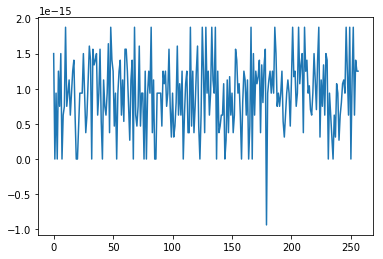

allan deviation: 4.86610684736e-16 +- 2.27440377944e-17/sqrt(Hz)


[1, 400, 3, 50]

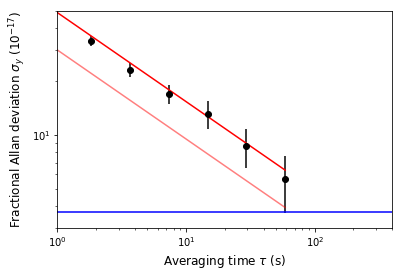

In [10]:
TR = 0.5  # Ramsey time.  Approximating as just hold time between pulses (conservative).
f0 = 429.8*10**12
cycle_dead = 0.09 + 0.03 # dead time per cycle. 90ms for imaging etc, 30ms for pi/2 pulses
cycles = 1 # number of cycles
load_time = 0.3 
Trep = load_time + cycles*(TR+cycle_dead)
contrast = 79 # measured contrast %, from set 29.  +- 3% 
fracfreqs =(1/(f0*contrast*np.pi*TR))*losses # convert loss to fractional frequency excursion
lasernoise = 3.7*10**(-17) # allan deviation associated with laser noise

plt.plot(fracfreqs)
plt.show()

def rootfit(t, a):
    return a/np.sqrt(t)

def bindata(data, n):
    m = len(data)
    if m%n:
        data = data[:-(m%n)]
    summed = [0]*int(m/n)
    for i in range(n):
        summed += data[i::n]
    return summed/n


taus = []
avars = []
avar_errs = []

nmax = np.floor(np.log2(len(losses)))-1
for n in np.arange(0, nmax):
    n = int(n)
    summed = bindata(fracfreqs,2**n)
    avar = 0.5*np.mean((summed[1:]-summed[:-1])**2)
    taus.append((2**n)*Trep)
    avars.append(avar)
    avar_errs.append(avar/(2*len(summed)))
    
adevs = np.sqrt(avars)
adev_errs = np.sqrt(avar_errs)
#popt, pcov = curve_fit(rootfit, taus[:3], np.sqrt(adevs[:3]**2 - lasernoise**2), sigma = adev_errs[:3])
popt, pcov = curve_fit(rootfit, taus[:3], adevs[:3], sigma = adev_errs[:3])


#plt.loglog(taus, rootfit(taus, *popt)*10**17, 'r-')
ax = plt.gca()

ax.plot(taus, rootfit(taus, *popt)*10**17, 'r-')
ax.plot(taus, rootfit(taus, 30), 'r-', alpha = 0.5)

#ax.plot(taus, np.sqrt((lasernoise*10**17)**2 + (rootfit(taus, 15))**2), 'r-')

ax.set_yscale('log')
ax.set_xscale('log')
ax.errorbar(taus, adevs*10**17, yerr =adev_errs*10**17, fmt = 'ko')
plt.plot([1, 500], [lasernoise*10**17]*2, 'b-')

print('allan deviation: ' + str(popt[0]) + ' +- ' + str(np.sqrt(pcov[0][0])) + '/sqrt(Hz)')
plt.xlabel('Averaging time '+r'$\tau$' + ' (s)', fontsize = 12)
plt.ylabel('Fractional Allan deviation '+ r'$\sigma_y \ (10^{-17}$)' , fontsize = 12)
#plt.yticks([])

plt.axis([1, 400, 3, 50])
